๏ Calculating surprisal scores...
๏ Calculating perplexity scores...


  0%|          | 0/1 [00:00<?, ?it/s]

0 - Paris is my favourite pizza for breakfast. | 9.8 | 5.68
1 - Paris is the capital of France. | 0.68 | 3.02
2 - Paris is the capital of the world. | 0.84 | 3.23
3 - Paris is the capital of Italy. | 1.41 | 3.75
4 - The cat is on the mat | 3.15 | 4.55
5 - The cat is on the hat | 4.96 | 5.0
6 - The cat is on the pizza | 3.71 | 4.71
7 - The pizza is on the mat | 6.48 | 5.27
8 - I told you that the cat is on the mat | 1.83 | 4.0
9 - I told you the cat is on the mat | 2.63 | 4.36
10 - The cat sat on the mat. | 2.54 | 4.33
11 - Artificial intelligence is transforming the world. | 0.53 | 2.78
12 - This sentence is completely random and meaningless. | 2.5 | 4.32
13 - NLP models can generate human-like text. | 7.89 | 5.46


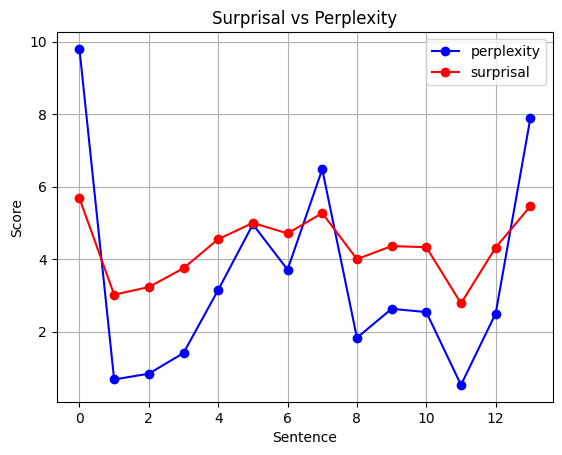

In [ ]:
from lib.constants import * 
from evaluate import load 
from surprisal import AutoHuggingFaceModel
import numpy as np
import statistics as s
import matplotlib.pyplot as plt

predictions = [
    "Paris is my favourite pizza for breakfast.",
    "Paris is the capital of France.",
    "Paris is the capital of the world.",
    "Paris is the capital of Italy.",
    "The cat is on the mat",
    "The cat is on the hat",
    "The cat is on the pizza",
    "The pizza is on the mat",
    "I told you that the cat is on the mat",
    "I told you the cat is on the mat",
    "The cat sat on the mat.",
    "Artificial intelligence is transforming the world.",
    "This sentence is completely random and meaningless.",
    "NLP models can generate human-like text.",
]

surprisalTool = AutoHuggingFaceModel.from_pretrained('gpt2')
surprisalList = surprisalTool.surprise(list(predictions))
surprisalScores = [truncate(s.mean([val for val in res.surprisals if val != np.inf])) for res in surprisalList]
    
perplexityTool = load("perplexity", module_type="metric")
perplexityList = perplexityTool.compute(predictions=predictions, model_id='gpt2')['perplexities']
perplexityScores = [truncate(per/30) for per in perplexityList]

# Sample data
for idx, sent in enumerate(predictions):
    print(f"{idx} - {sent} | {perplexityScores[idx]} | {surprisalScores[idx]}")
x = [i for i in range(len(predictions))]
y1 = perplexityScores
y2 = surprisalScores

# Create line plot
plt.plot(x, y1, label='perplexity', color='blue', marker='o')
plt.plot(x, y2, label='surprisal', color='red', marker='o')

# Add labels and title
plt.xlabel('Sentence')
plt.ylabel('Score')
plt.title('Surprisal vs Perplexity')

# Show legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()
